In [0]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19879 sha256=de188d9501662385427f3dde32362c136aeba10f41977de251e99625ff8b8616
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [0]:
#Import all libraries
from vecstack import stacking
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change

In [0]:
 #To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#Read training data file

trainfile = r'/gdrive/My Drive/CIS 508 Python/Team Assignment/house_price_train.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/CIS 508 Python/Team Assignment/house_price_test.csv'
testData = pd.read_csv(testfile)

# copy of train data and test data to perform pre processing
cpy_traindata = trainData.copy()
cpy_testdata = testData.copy()

trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
# check if same columns are present in Train and Test Data 
trainData.columns.difference(testData.columns)
# All should be same except revenue

Index(['SalePrice'], dtype='object')

In [0]:
#Shape and data types of data
print("Training Data shape:",trainData.shape)
print("Test Data shape:",testData.shape)
print("Training Data types:",trainData.dtypes)
# variable data types
trainData.describe()

Training Data shape: (1460, 81)
Test Data shape: (1459, 80)
Training Data types: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
# Remove ID column from training and test dataset
cpy_traindata.drop("Id", axis=1, inplace=True)
cpy_testdata.drop("Id", axis=1, inplace=True)
print("After removing QuoteNumber column,training data shape: ",cpy_traindata.shape)
print("After removing QuoteNumber column test data shape: ",cpy_testdata.shape)

After removing QuoteNumber column,training data shape:  (1460, 80)
After removing QuoteNumber column test data shape:  (1459, 79)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


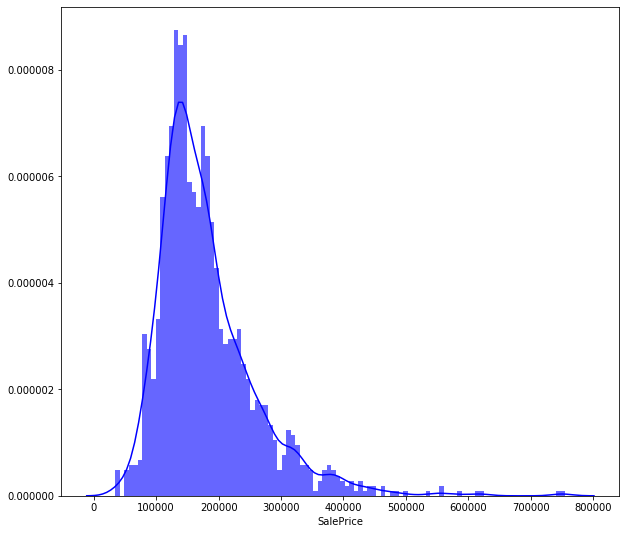

In [0]:
# distribution of sales data
print(trainData['SalePrice'].describe())
plt.figure(figsize=(10, 9))
sns.distplot(trainData['SalePrice'], color='blue', bins=100, hist_kws={'alpha': 0.6});

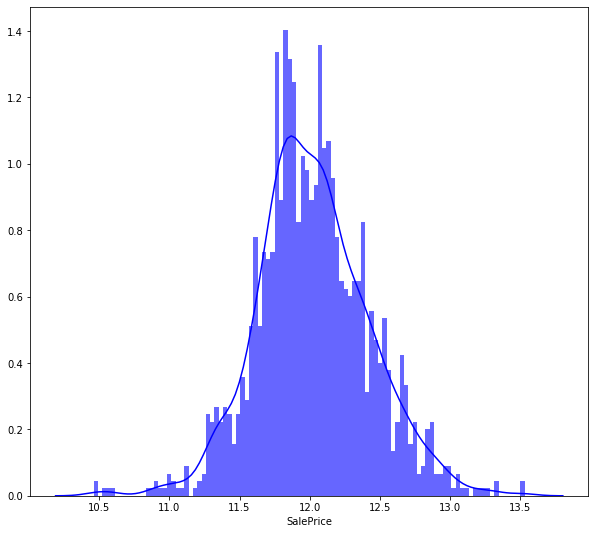

In [0]:
#log transformed salesprice
plt.figure(figsize=(10, 9))
sns.distplot(np.log(trainData['SalePrice']), color='blue', bins=100, hist_kws={'alpha': 0.6});

-----------------------------
MSZoning
C (all)     0.684932
FV          4.452055
RH          1.095890
RL         78.835616
RM         14.931507
Name: MSZoning, dtype: float64


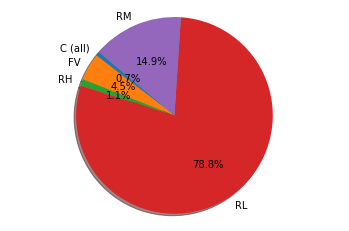

-----------------------------
Street
Grvl     0.410959
Pave    99.589041
Name: Street, dtype: float64


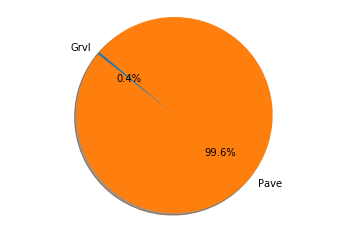

-----------------------------
Alley
Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64


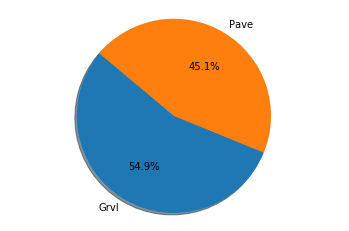

-----------------------------
LotShape
IR1    33.150685
IR2     2.808219
IR3     0.684932
Reg    63.356164
Name: LotShape, dtype: float64


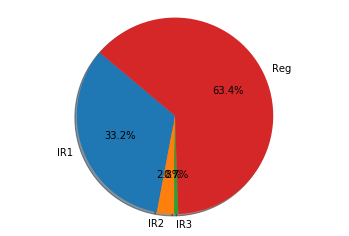

-----------------------------
LandContour
Bnk     4.315068
HLS     3.424658
Low     2.465753
Lvl    89.794521
Name: LandContour, dtype: float64


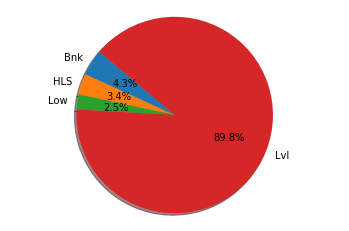

-----------------------------
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


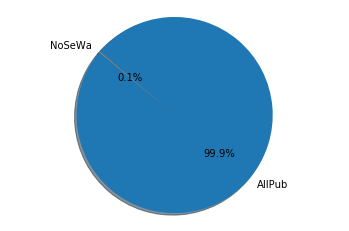

-----------------------------
LotConfig
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Inside     72.054795
Name: LotConfig, dtype: float64


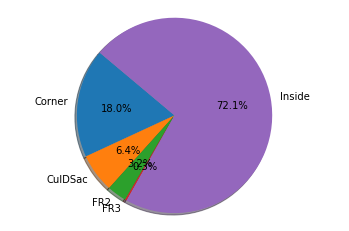

-----------------------------
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


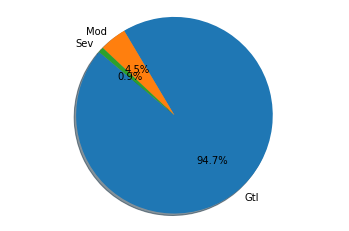

-----------------------------
Neighborhood
Blmngtn     1.164384
Blueste     0.136986
BrDale      1.095890
BrkSide     3.972603
ClearCr     1.917808
CollgCr    10.273973
Crawfor     3.493151
Edwards     6.849315
Gilbert     5.410959
IDOTRR      2.534247
MeadowV     1.164384
Mitchel     3.356164
NAmes      15.410959
NPkVill     0.616438
NWAmes      5.000000
NoRidge     2.808219
NridgHt     5.273973
OldTown     7.739726
SWISU       1.712329
Sawyer      5.068493
SawyerW     4.041096
Somerst     5.890411
StoneBr     1.712329
Timber      2.602740
Veenker     0.753425
Name: Neighborhood, dtype: float64


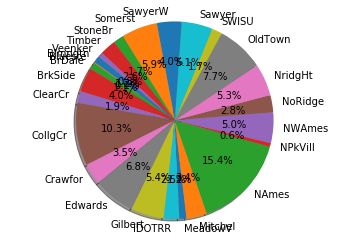

-----------------------------
Condition1
Artery     3.287671
Feedr      5.547945
Norm      86.301370
PosA       0.547945
PosN       1.301370
RRAe       0.753425
RRAn       1.780822
RRNe       0.136986
RRNn       0.342466
Name: Condition1, dtype: float64


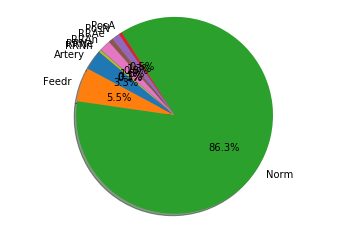

-----------------------------
Condition2
Artery     0.136986
Feedr      0.410959
Norm      98.972603
PosA       0.068493
PosN       0.136986
RRAe       0.068493
RRAn       0.068493
RRNn       0.136986
Name: Condition2, dtype: float64


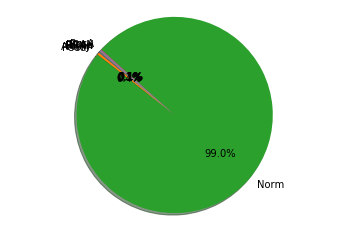

-----------------------------
BldgType
1Fam      83.561644
2fmCon     2.123288
Duplex     3.561644
Twnhs      2.945205
TwnhsE     7.808219
Name: BldgType, dtype: float64


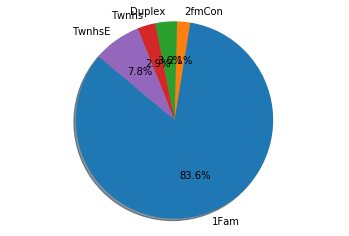

-----------------------------
HouseStyle
1.5Fin    10.547945
1.5Unf     0.958904
1Story    49.726027
2.5Fin     0.547945
2.5Unf     0.753425
2Story    30.479452
SFoyer     2.534247
SLvl       4.452055
Name: HouseStyle, dtype: float64


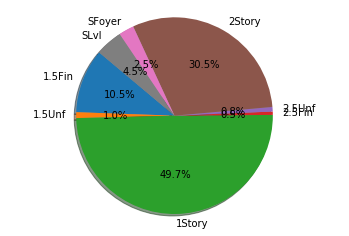

-----------------------------
RoofStyle
Flat        0.890411
Gable      78.150685
Gambrel     0.753425
Hip        19.589041
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64


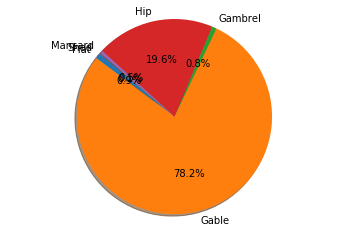

-----------------------------
RoofMatl
ClyTile     0.068493
CompShg    98.219178
Membran     0.068493
Metal       0.068493
Roll        0.068493
Tar&Grv     0.753425
WdShake     0.342466
WdShngl     0.410959
Name: RoofMatl, dtype: float64


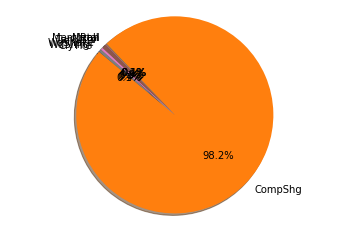

-----------------------------
Exterior1st
AsbShng     1.369863
AsphShn     0.068493
BrkComm     0.136986
BrkFace     3.424658
CBlock      0.068493
CemntBd     4.178082
HdBoard    15.205479
ImStucc     0.068493
MetalSd    15.068493
Plywood     7.397260
Stone       0.136986
Stucco      1.712329
VinylSd    35.273973
Wd Sdng    14.109589
WdShing     1.780822
Name: Exterior1st, dtype: float64


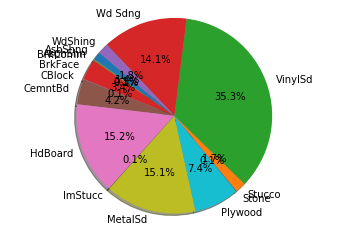

-----------------------------
Exterior2nd
AsbShng     1.369863
AsphShn     0.205479
Brk Cmn     0.479452
BrkFace     1.712329
CBlock      0.068493
CmentBd     4.109589
HdBoard    14.178082
ImStucc     0.684932
MetalSd    14.657534
Other       0.068493
Plywood     9.726027
Stone       0.342466
Stucco      1.780822
VinylSd    34.520548
Wd Sdng    13.493151
Wd Shng     2.602740
Name: Exterior2nd, dtype: float64


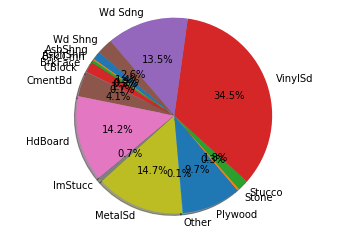

-----------------------------
MasVnrType
BrkCmn      1.027397
BrkFace    30.479452
None       59.178082
Stone       8.767123
Name: MasVnrType, dtype: float64


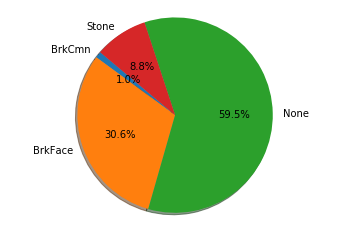

-----------------------------
ExterQual
Ex     3.561644
Fa     0.958904
Gd    33.424658
TA    62.054795
Name: ExterQual, dtype: float64


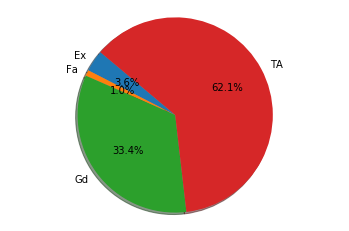

-----------------------------
ExterCond
Ex     0.205479
Fa     1.917808
Gd    10.000000
Po     0.068493
TA    87.808219
Name: ExterCond, dtype: float64


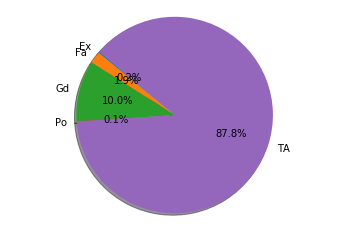

-----------------------------
Foundation
BrkTil    10.000000
CBlock    43.424658
PConc     44.315068
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64


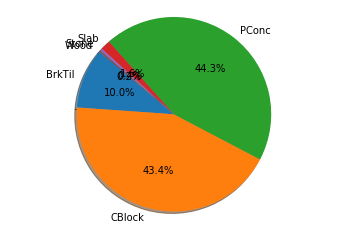

-----------------------------
BsmtQual
Ex     8.287671
Fa     2.397260
Gd    42.328767
TA    44.452055
Name: BsmtQual, dtype: float64


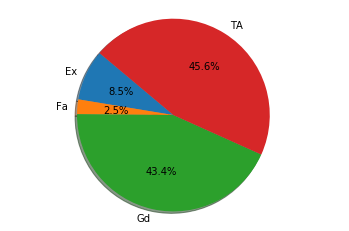

-----------------------------
BsmtCond
Fa     3.082192
Gd     4.452055
Po     0.136986
TA    89.794521
Name: BsmtCond, dtype: float64


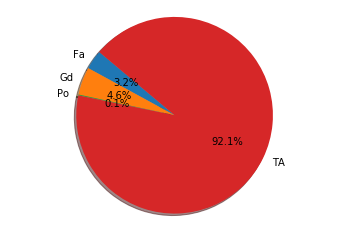

-----------------------------
BsmtExposure
Av    15.136986
Gd     9.178082
Mn     7.808219
No    65.273973
Name: BsmtExposure, dtype: float64


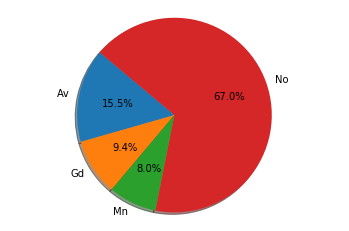

-----------------------------
BsmtFinType1
ALQ    15.068493
BLQ    10.136986
GLQ    28.630137
LwQ     5.068493
Rec     9.109589
Unf    29.452055
Name: BsmtFinType1, dtype: float64


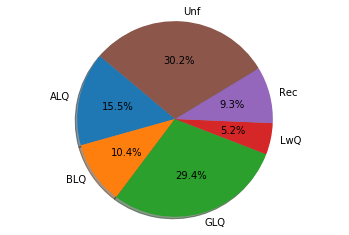

-----------------------------
BsmtFinType2
ALQ     1.301370
BLQ     2.260274
GLQ     0.958904
LwQ     3.150685
Rec     3.698630
Unf    86.027397
Name: BsmtFinType2, dtype: float64


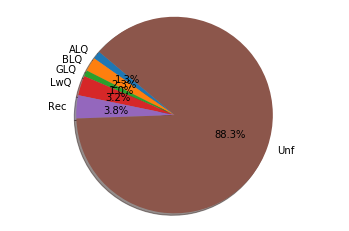

-----------------------------
Heating
Floor     0.068493
GasA     97.808219
GasW      1.232877
Grav      0.479452
OthW      0.136986
Wall      0.273973
Name: Heating, dtype: float64


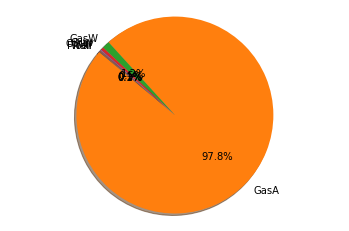

-----------------------------
HeatingQC
Ex    50.753425
Fa     3.356164
Gd    16.506849
Po     0.068493
TA    29.315068
Name: HeatingQC, dtype: float64


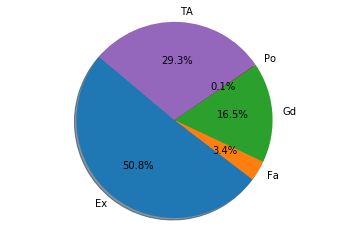

-----------------------------
CentralAir
N     6.506849
Y    93.493151
Name: CentralAir, dtype: float64


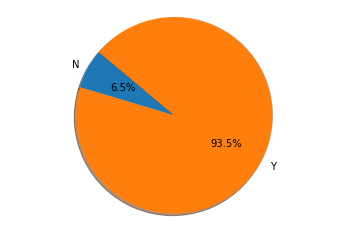

-----------------------------
Electrical
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
SBrkr    91.369863
Name: Electrical, dtype: float64


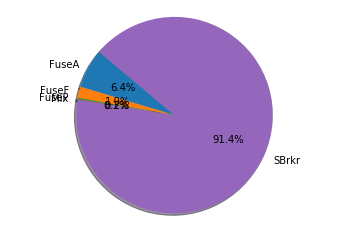

-----------------------------
KitchenQual
Ex     6.849315
Fa     2.671233
Gd    40.136986
TA    50.342466
Name: KitchenQual, dtype: float64


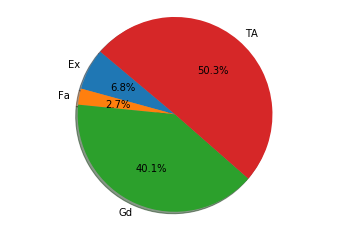

-----------------------------
Functional
Maj1     0.958904
Maj2     0.342466
Min1     2.123288
Min2     2.328767
Mod      1.027397
Sev      0.068493
Typ     93.150685
Name: Functional, dtype: float64


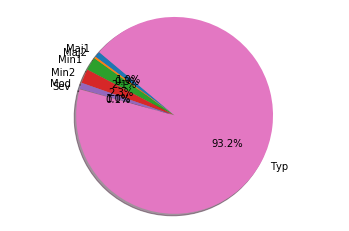

-----------------------------
FireplaceQu
Ex     1.643836
Fa     2.260274
Gd    26.027397
Po     1.369863
TA    21.438356
Name: FireplaceQu, dtype: float64


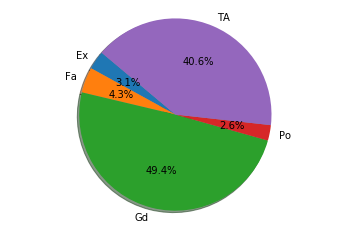

-----------------------------
GarageType
2Types      0.410959
Attchd     59.589041
Basment     1.301370
BuiltIn     6.027397
CarPort     0.616438
Detchd     26.506849
Name: GarageType, dtype: float64


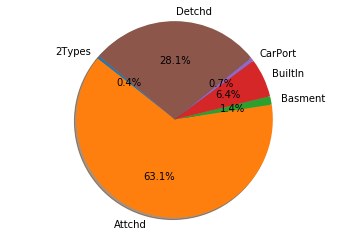

-----------------------------
GarageFinish
Fin    24.109589
RFn    28.904110
Unf    41.438356
Name: GarageFinish, dtype: float64


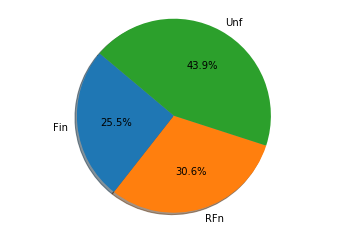

-----------------------------
GarageQual
Ex     0.205479
Fa     3.287671
Gd     0.958904
Po     0.205479
TA    89.794521
Name: GarageQual, dtype: float64


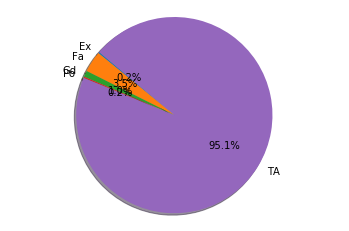

-----------------------------
GarageCond
Ex     0.136986
Fa     2.397260
Gd     0.616438
Po     0.479452
TA    90.821918
Name: GarageCond, dtype: float64


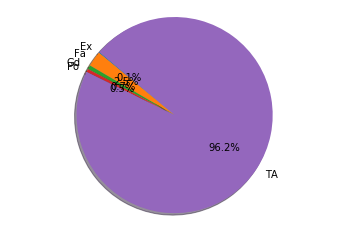

-----------------------------
PavedDrive
N     6.164384
P     2.054795
Y    91.780822
Name: PavedDrive, dtype: float64


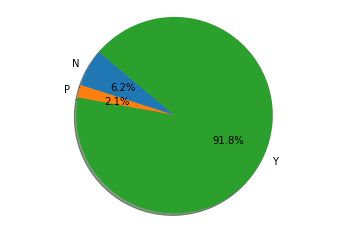

-----------------------------
PoolQC
Ex    0.136986
Fa    0.136986
Gd    0.205479
Name: PoolQC, dtype: float64


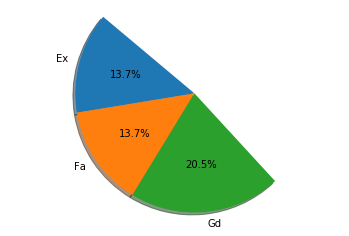

-----------------------------
Fence
GdPrv     4.041096
GdWo      3.698630
MnPrv    10.753425
MnWw      0.753425
Name: Fence, dtype: float64


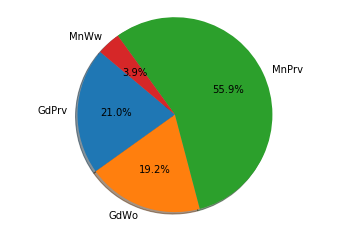

-----------------------------
MiscFeature
Gar2    0.136986
Othr    0.136986
Shed    3.356164
TenC    0.068493
Name: MiscFeature, dtype: float64


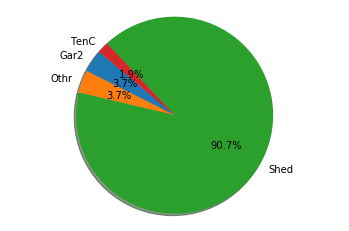

-----------------------------
SaleType
COD       2.945205
CWD       0.273973
Con       0.136986
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
New       8.356164
Oth       0.205479
WD       86.780822
Name: SaleType, dtype: float64


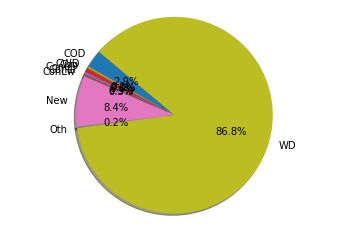

-----------------------------
SaleCondition
Abnorml     6.917808
AdjLand     0.273973
Alloca      0.821918
Family      1.369863
Normal     82.054795
Partial     8.561644
Name: SaleCondition, dtype: float64


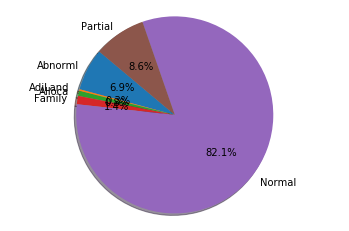

In [0]:
#summary of categorical variables in training data
categoricalFeatures =  trainData.select_dtypes(exclude=['float','int']).columns
for col in categoricalFeatures:
    print("-----------------------------")
    print(trainData.groupby(col)[col].count()/len(trainData) * 100)
    df = pd.DataFrame(trainData.groupby(col)[col].count()/len(trainData) * 100)
    labels = df.index
    sizes = df[col]
    # Plot
    plt.pie(sizes, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()


In [0]:
# check if there are any missing values in any column
print("Number of null values in train data",trainData.isnull().sum().sum())
print("Number of null values in test data",testData.isnull().sum().sum())
# no missing values

Number of null values in train data 6965
Number of null values in test data 7000


In [0]:
# percentage missing data per column in training data
trainData_na = (trainData.isnull().sum() / len(trainData)) * 100
trainData_na = trainData_na.drop(trainData_na[trainData_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :trainData_na})
missing_data['No_of_rows_missing'] = trainData.isnull().sum()
print("Missing data in train\n",missing_data)
# percentage missing data per column in test data
testData_na = (testData.isnull().sum() / len(testData)) * 100
testData_na = testData_na.drop(testData_na[testData_na == 0].index).sort_values(ascending=False)
missing_data_test = pd.DataFrame({'Missing Ratio' :testData_na})
missing_data_test['No_of_rows_missing'] = testData.isnull().sum()
print("Missing data in test\n",missing_data_test)

Missing data in train
               Missing Ratio  No_of_rows_missing
PoolQC            99.520548                1453
MiscFeature       96.301370                1406
Alley             93.767123                1369
Fence             80.753425                1179
FireplaceQu       47.260274                 690
LotFrontage       17.739726                 259
GarageYrBlt        5.547945                  81
GarageType         5.547945                  81
GarageFinish       5.547945                  81
GarageQual         5.547945                  81
GarageCond         5.547945                  81
BsmtFinType2       2.602740                  38
BsmtExposure       2.602740                  38
BsmtFinType1       2.534247                  37
BsmtCond           2.534247                  37
BsmtQual           2.534247                  37
MasVnrArea         0.547945                   8
MasVnrType         0.547945                   8
Electrical         0.068493                   1
Missing data in t

In [0]:
#Remove columns from train and test with more than 40% missing data (columns are same)
cpy_traindata = cpy_traindata.drop(columns = missing_data[ missing_data['Missing Ratio'] > 40].index)
print("After removing columns with more than 40% data from train, shape-", cpy_traindata.shape)
cpy_testdata = cpy_testdata.drop(columns = missing_data[ missing_data['Missing Ratio'] > 40].index)
print("After removing columns with more than 40% data from test, shape-", cpy_testdata.shape)

After removing columns with more than 40% data from train, shape- (1460, 75)
After removing columns with more than 40% data from test, shape- (1459, 74)


In [0]:
#remove 1 row with electrical data missing from training data
cpy_traindata.dropna(subset=['Electrical'], how='all', inplace=True)
print("After removing row with missing value in Electrical-", cpy_traindata.shape)

After removing row with missing value in Electrical- (1459, 75)


In [0]:
# remove target column from train data and store in Y_Train

Y_Train1 = np.log(cpy_traindata["SalePrice"])


cpy_traindata = cpy_traindata.drop(["SalePrice"], axis=1)

# now combine train and test data and impute values
combined_data = pd.concat([cpy_traindata, cpy_testdata], keys=[0,1])
print("Shape of combined data:",combined_data.shape)
#numerical columns, impute with mean
numeric_cols=combined_data.select_dtypes(include=['int','float64']).columns
for c in numeric_cols:
    combined_data[c] = combined_data[c].fillna(combined_data[c].mean())

#categorical columns impute with mode
cat_cols=combined_data.select_dtypes(include=['object']).columns
for c in cat_cols:
    combined_data[c] = combined_data[c].fillna(combined_data[c].value_counts().index[0])

print("Number of remaining null values in data",combined_data.isnull().sum().sum())

Shape of combined data: (2918, 74)
Number of remaining null values in data 0


In [0]:
#Do one Hot encoding for categorical features for combined data
combined_data = pd.get_dummies(combined_data,columns=cat_cols)

#Separate Train data and test data
X_Train = combined_data.xs(0)
X_Test = combined_data.xs(1)

X_Train = pd.DataFrame(X_Train)
X_Test = pd.DataFrame(X_Test)

print("Test data",X_Test.shape)
print("Training data", X_Train.shape)

Test data (1459, 270)
Training data (1459, 270)


In [0]:
# Remove columns from training and test dataset which have 0 standard deviation 
counter_col_removed = 0
for (columnName, columnData) in X_Train.iteritems():
    std_dev = ( round(X_Train[columnName].std(),2))
    if (std_dev == 0):
        X_Train = X_Train.drop(columns = columnName)
        X_Test = X_Test.drop(columns = columnName)
        print(columnName)
        counter_col_removed = counter_col_removed + 1
        
print("After removing columns:",counter_col_removed, "training data shape: ",X_Train.shape)
print("After removing columns:",counter_col_removed, "test data shape: ",X_Test.shape)

After removing columns: 0 training data shape:  (1459, 270)
After removing columns: 0 test data shape:  (1459, 270)


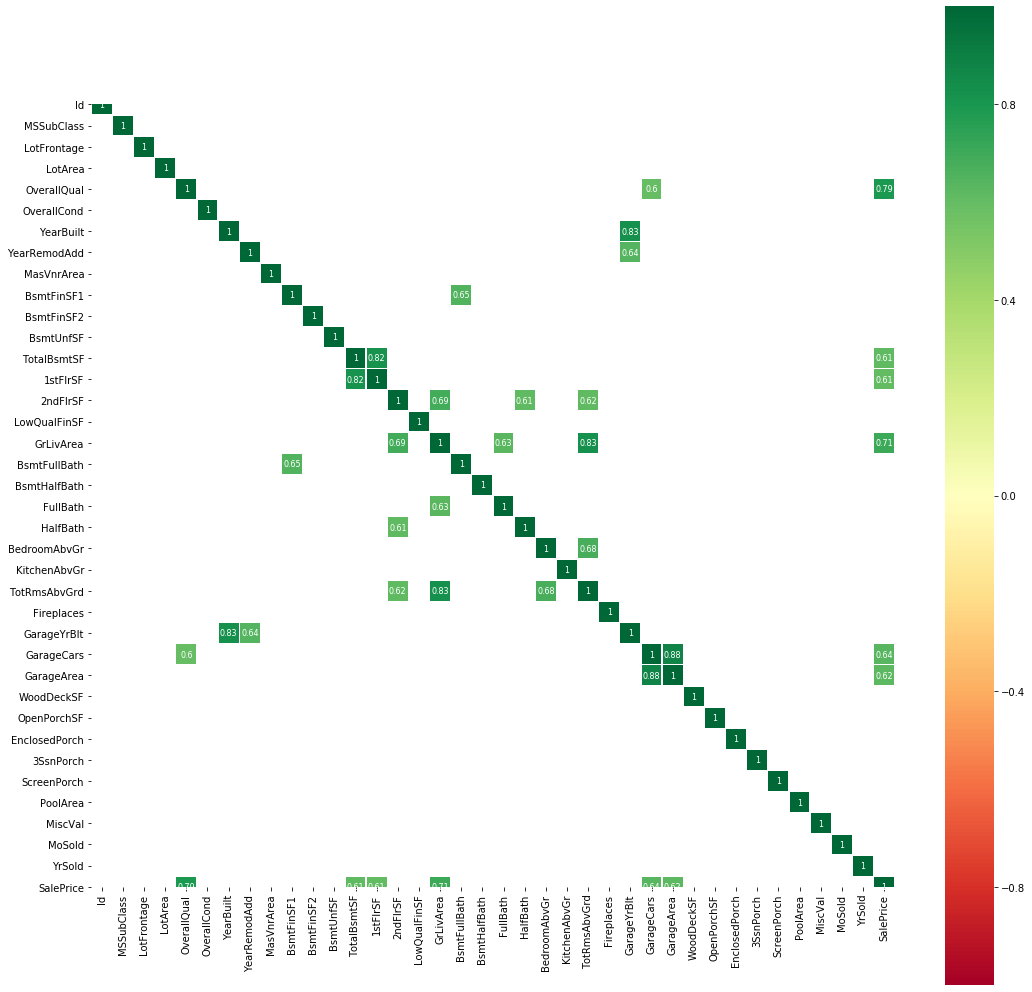

In [0]:
corr = trainData.corr() 
plt.figure(figsize=(18, 18))

sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.5)], 
            cmap='RdYlGn', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
corr_matrix = pd.DataFrame(X_Train.iloc[:,:-1].corr())
# remove columns which are highly correlated except for target column
arr = corr_matrix.values
index_names = corr_matrix.index
col_names = corr_matrix.columns

#  Get indices where such threshold is crossed; avoid diagonal elems
R,C = np.where(np.triu(arr,1) > 0.75)

# Arrange those in columns and put out as a dataframe
out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=['row_name','col_name','corr_value'])

#Remove columns listed in col_name and keep columns in row_name ( Need to keep only 1 of related columns)
df_out = df_out.sort_values(by = 'corr_value', ascending = False)
df_out = df_out.query('row_name != col_name')

print("Columns with high correlation:", df_out)


Columns with high correlation:                row_name              col_name corr_value
8    Exterior1st_CBlock    Exterior2nd_CBlock          1
14  Exterior1st_VinylSd   Exterior2nd_VinylSd   0.977496
9   Exterior1st_CemntBd   Exterior2nd_CmentBd    0.97417
11  Exterior1st_MetalSd   Exterior2nd_MetalSd   0.973062
10  Exterior1st_HdBoard   Exterior2nd_HdBoard   0.883258
4            GarageCars            GarageArea   0.882613
5           MSZoning_FV  Neighborhood_Somerst   0.862802
15  Exterior1st_Wd Sdng   Exterior2nd_Wd Sdng   0.859229
7   Exterior1st_AsbShng   Exterior2nd_AsbShng   0.847915
6        RoofStyle_Flat      RoofMatl_Tar&Grv   0.834913
3             GrLivArea          TotRmsAbvGrd   0.825576
1           TotalBsmtSF              1stFlrSF   0.819393
16        GarageQual_Ex         GarageCond_Ex   0.816216
2              2ndFlrSF     HouseStyle_2Story   0.809701
0             YearBuilt           GarageYrBlt   0.781234
13   Exterior1st_Stucco    Exterior2nd_Stucco   0.780634


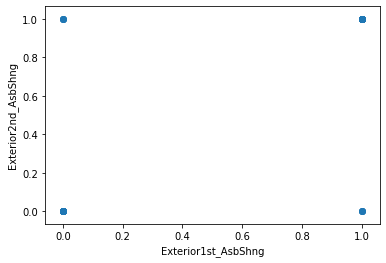

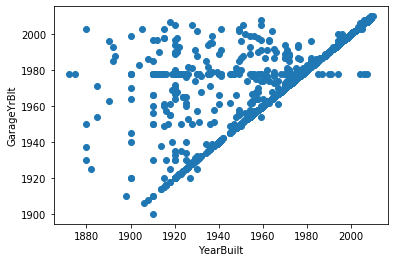

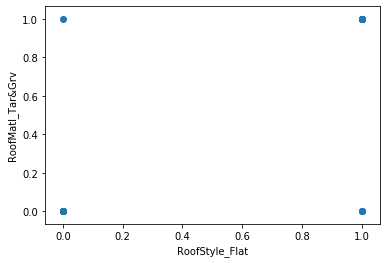

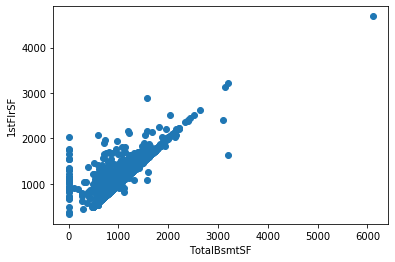

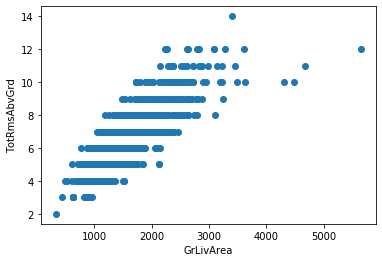

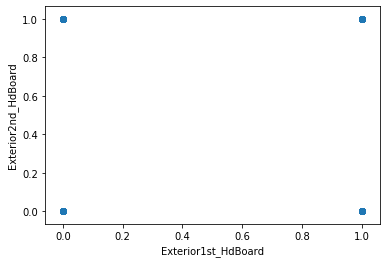

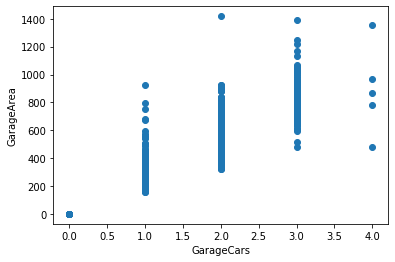

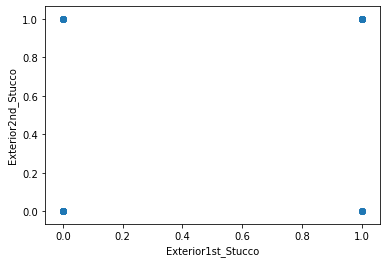

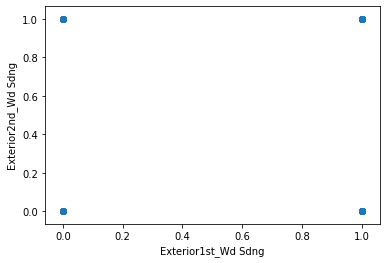

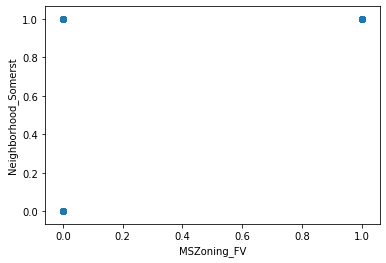

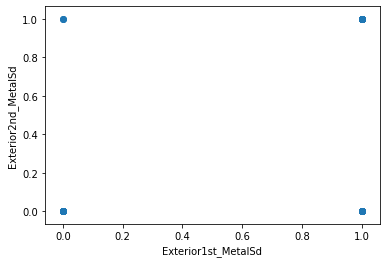

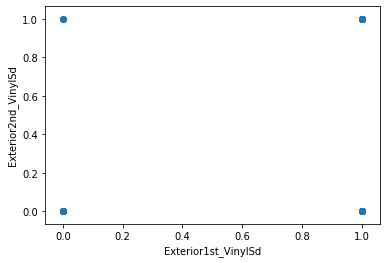

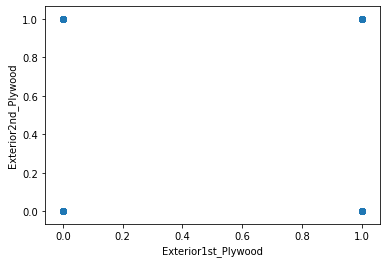

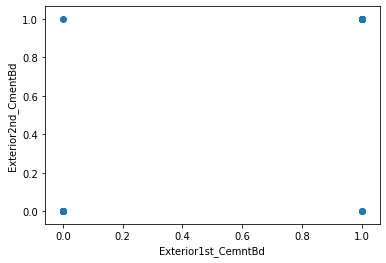

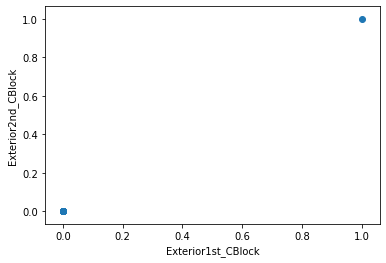

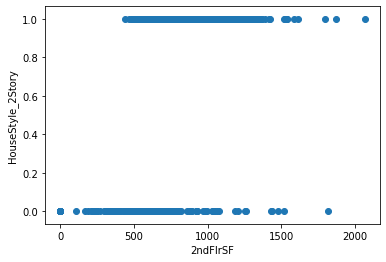

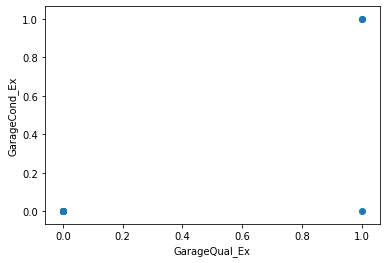

In [0]:
#plotting
for i in df_out.index:
    plt.scatter(X_Train[df_out.iloc[i,0]], X_Train[df_out.iloc[i,1]]) 
    plt.xlabel(df_out.iloc[i,0])
    plt.ylabel(df_out.iloc[i,1])
    plt.show()

In [0]:
#drop 1 of the column which is correlated
X_Train.drop(df_out['col_name'].unique(),axis=1, inplace=True)
X_Test.drop(df_out['col_name'].unique(),axis=1, inplace=True)
print("Columns removed\n",df_out.col_name)
print("After removing highly related columns,training data shape: ",X_Train.shape)
print("After removing highly related columns, test data shape: ",X_Test.shape)

Columns removed
 8       Exterior2nd_CBlock
14     Exterior2nd_VinylSd
9      Exterior2nd_CmentBd
11     Exterior2nd_MetalSd
10     Exterior2nd_HdBoard
4               GarageArea
5     Neighborhood_Somerst
15     Exterior2nd_Wd Sdng
7      Exterior2nd_AsbShng
6         RoofMatl_Tar&Grv
3             TotRmsAbvGrd
1                 1stFlrSF
16           GarageCond_Ex
2        HouseStyle_2Story
0              GarageYrBlt
13      Exterior2nd_Stucco
12     Exterior2nd_Plywood
Name: col_name, dtype: object
After removing highly related columns,training data shape:  (1459, 253)
After removing highly related columns, test data shape:  (1459, 253)


In [0]:
export_X_train = X_Train.to_csv(r'/gdrive/My Drive/CIS 508 Python/Team Assignment/exporttrain.csv')
export_X_test = X_Test.to_csv(r'/gdrive/My Drive/CIS 508 Python/Team Assignment/exporttest.csv')


In [0]:
trainpp = r'/gdrive/My Drive/CIS 508 Python/Team Assignment/exporttrain.csv'
X_TrainPP = pd.read_csv(trainpp) #creates a dataframe
X_TrainPP.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,854,0,1710,1.0,0.0,2,1,3,1,0,2.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,0,0,1262,0.0,1.0,2,0,3,1,1,2.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,866,0,1786,1.0,0.0,2,1,3,1,1,2.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,756,0,1717,1.0,0.0,1,0,3,1,1,3.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1053,0,2198,1.0,0.0,2,1,4,1,1,3.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
testpp = r'/gdrive/My Drive/CIS 508 Python/Team Assignment/exporttest.csv'
X_TestPP = pd.read_csv(testpp) #creates a dataframe
X_TestPP.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,0,0,896,0.0,0.0,1,0,2,1,0,1.0,140,0,0,0,120,0,0,6,2010,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,0,0,1329,0.0,0.0,1,1,3,1,0,1.0,393,36,0,0,0,0,12500,6,2010,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,701,0,1629,0.0,0.0,2,1,3,1,1,2.0,212,34,0,0,0,0,0,3,2010,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,678,0,1604,0.0,0.0,2,1,3,1,1,2.0,360,36,0,0,0,0,0,6,2010,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,0,0,1280,0.0,0.0,2,0,2,1,0,2.0,0,82,0,0,144,0,0,1,2010,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
#split the entire training data in training and test data
X_Train, X_Test_1, Y_Train, Y_Test_1 = train_test_split( X_TrainPP, Y_Train1, test_size=0.20, random_state=42)
print("Initial shape for entire data:",X_TrainPP.shape)
print("Shape of new training data:", X_Train.shape)
print("Shape of new test split data:", X_Test_1.shape)

Initial shape for entire data: (1459, 254)
Shape of new training data: (1167, 254)
Shape of new test split data: (292, 254)


# Decision Trees Regressor

In [0]:
#Decision Tree Regressor ========================================================================
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
clf = DecisionTreeRegressor()
clf.fit(X_Train, Y_Train)
model_score = clf.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the train data prediction.:',model_score)
clf_predict_Train=clf.predict(X_Test_1)

#clf.feature_importances_
print("Root Mean squared error on test data: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, clf_predict_Train)))
print('Test Variance score for test data: %.2f' % r2_score(Y_Test_1, clf_predict_Train))

Coefficient of determination R^2 of the train data prediction.: 0.9999999940379681
Root Mean squared error on test data: 0.21
Test Variance score for test data: 0.76


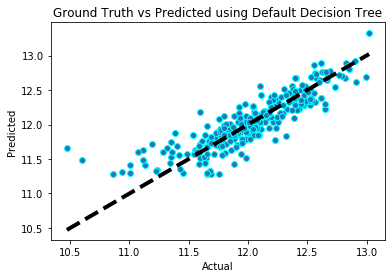

In [0]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test_1, clf_predict_Train, edgecolors=(0, 1, 1))
ax.plot([Y_Test_1.min(), Y_Test_1.max()], [Y_Test_1.min(), Y_Test_1.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted using Default Decision Tree")
plt.show()

In [0]:
#Save predictions using default decision tree
pred_test =pd.DataFrame(clf.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/508-Team-log/DT-D.csv", index = None)

In [0]:
#Hyperparameter tuning for decision trees - grid search
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": range(2,25,5),
              "max_depth": range(10,100,10),
              "min_samples_leaf": range(2,25,5),
              "max_leaf_nodes": range(2,25,5),
              }

grid_cv_dtm = GridSearchCV(clf, param_grid, cv=5)

grid_cv_dtm.fit(X_Train,Y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(10, 100, 10),
                         'max_leaf_nodes': range(2, 25, 5),
                         'min_samples_le

In [0]:
#hyperparameter tuning grid parameters
grid_parm=grid_cv_dtm.best_params_
print(grid_parm)
clf = DecisionTreeRegressor(**grid_parm)
clf.fit(X_Train, Y_Train) 
model_score = clf.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)

y_predicted = clf.predict(X_Test_1)

# The mean squared error
print("Root Mean squared error on test data: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test data: %.2f' % r2_score(Y_Test_1, y_predicted))

{'criterion': 'mae', 'max_depth': 10, 'max_leaf_nodes': 22, 'min_samples_leaf': 17, 'min_samples_split': 2}
Coefficient of determination R^2 of the prediction on train: 0.7983408025313363
Root Mean squared error on test data: 0.20
Test Variance score on test data: 0.77


In [0]:
#run cross-validation on best hyperparameters, get auc score
clf_cv_score = cross_val_score(clf, X_Train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(clf_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - Decision Tree: ",clf_cv_score.mean())

=== R2 Scores on training ===
[0.76319484 0.73238489 0.72482897 0.72062417 0.76633786]


=== Mean R2 Score on training ===
Mean R2 Score - Decision Tree:  0.7414741456494965


In [0]:
#Save predictions of tuned decision tree
pred_test =pd.DataFrame(clf.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/508-Team-log/DT-Grid.csv", index = None)


In [0]:
#Hyperparameter tuning done for decision tree regressor- Random search
print("RandomizedSearchCV-Decision tree")
clf = DecisionTreeRegressor()
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2),"criterion": ["mse", "mae"]}
clf_random = RandomizedSearchCV(clf,parameters,n_iter=5)
clf_random.fit(X_Train, Y_Train)
rand_parm=clf_random.best_params_
print(rand_parm)

RandomizedSearchCV-Decision tree
{'min_samples_split': 40, 'max_depth': 19, 'criterion': 'mse'}


In [0]:
clf = DecisionTreeRegressor(**rand_parm)
clf.fit(X_Train, Y_Train) 
model_score = clf.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction.:',model_score)

y_predicted = clf.predict(X_Test_1)

# The mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction.: 0.8845527419293018
Root Mean squared error: 0.19
Test Variance score: 0.79


In [0]:
#run cross-validation on best hyperparameters, get r2 score
clf_cv_score = cross_val_score(clf, X_Train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(clf_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - Decision Tree: ",clf_cv_score.mean())

=== R2 Scores on training ===
[0.78921826 0.74895694 0.71587044 0.75363709 0.7385828 ]


=== Mean R2 Score on training ===
Mean R2 Score - Decision Tree:  0.7492531058935147


In [0]:
#Save predictions
pred_test =pd.DataFrame(clf.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/DT-Random-HT.csv", index = None)


# Random Forest Regressor

In [0]:
#Random Forest Regressor==============================================================================
rfr = RandomForestRegressor()
rfr.fit(X_Train, Y_Train)
model_score = rfr.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)
rfr_predict_Train=rfr.predict(X_Test_1)

#clf.feature_importances_
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, rfr_predict_Train)))
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, rfr_predict_Train))

Coefficient of determination R^2 of the prediction on train: 0.9724403118852285
Root Mean squared error on test: 0.15
Test Variance score on test: 0.87


In [0]:
#Save predictions for default random forest
pred_test =pd.DataFrame(rfr.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/508-Team-log/RF-D.csv", index = None)


In [0]:
#Grid search hyperparameter tuning for random forest
param_grid = {'n_estimators': range(50,100,10),
              'min_samples_split' : range(10,100,10),
              'max_depth': range(1,20,2)
              }

grid_cv_dtm = GridSearchCV(rfr, param_grid, cv=5)
grid_cv_dtm.fit(X_Train,Y_Train)

grid_parm_rf=grid_cv_dtm.best_params_
print(grid_parm_rf)

{'max_depth': 17, 'min_samples_split': 10, 'n_estimators': 80}


In [0]:
#model with hyper tuned parameters
rfr = RandomForestRegressor(**grid_parm_rf)
rfr.fit(X_Train, Y_Train) 
model_score = rfr.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train data:',model_score)

y_predicted = rfr.predict(X_Test_1)

# The mean squared error
print("Root Mean squared error on test data: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test data: %.2f' % r2_score(Y_Test_1, y_predicted))

{'max_depth': 17, 'min_samples_split': 10, 'n_estimators': 60}
coefficient of determination R^2 of the prediction.: 0.9647470237676757
Root Mean squared error: 0.14
Test Variance score: 0.88


In [0]:
#run cross-validation on best hyperparameters, get r2 score
rfr_cv_score = cross_val_score(rfr, X_Train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(rfr_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - Random forest: ",rfr_cv_score.mean())

=== R2 Scores on training ===
[0.84356017 0.80713565 0.84918611 0.84146291 0.85540521]


=== Mean R2 Score on training ===
Mean R2 Score - Decision Tree:  0.8393500073212407


In [0]:
#Save predictions for tuned random forest - grid search
pred_test =pd.DataFrame(rfr.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/RF-Grid.csv", index = None)


In [0]:
#Hyperparameter tuning done for random forest regressor - Random search
print("RandomizedSearchCV-Random Forest")
rfr = RandomForestRegressor()
parameters={ 'n_estimators': range(50,100,10),'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
rfr_random = RandomizedSearchCV(rfr,parameters,n_iter=5)
rfr_random.fit(X_Train, Y_Train)
rand_parm_rf=rfr_random.best_params_
print(rand_parm_rf)

RandomizedSearchCV-Random Forest
{'n_estimators': 80, 'min_samples_split': 10, 'max_depth': 15}


In [0]:
#Random forest model with tuned paramaters from random search
rfr = RandomForestRegressor(**rand_parm_rf)
rfr.fit(X_Train, Y_Train) 
model_score = rfr.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)

y_predicted = rfr.predict(X_Test_1)

# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.9638714121034258
Root Mean squared error on test: 0.14
Test Variance score on test: 0.88


In [0]:
#run cross-validation on best hyperparameters, get r2 score
rfr_cv_score = cross_val_score(rfr, X_Train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(rfr_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - Random forest: ",rfr_cv_score.mean())

=== R2 Scores on training ===
[0.86365119 0.80893633 0.84957699 0.86464431 0.87716316]


=== Mean R2 Score on training ===
Mean R2 Score - Random forest:  0.8527943969203393


In [0]:
#Save predictions with tuned paramaters from random search
pred_test =pd.DataFrame(rfr.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/RF-Random-HT.csv", index = None)

# Gradient Boosting Regressor

In [0]:
#Gradient Boosting ============================================================
abc =GradientBoostingRegressor()
abc.fit(X_Train, Y_Train)
model_score = abc.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)
y_predicted = abc.predict(X_Test_1)

# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.9615589091982971
Root Mean squared error on test: 0.13
Test Variance score on test: 0.90


In [0]:
#Save predictions using deafult Gradient boosting
pred_test =pd.DataFrame(abc.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/GB-D.csv", index = None)

In [0]:
#Randomized Search for hyperparameter tuning - grid search
search_grid={'n_estimators':[20, 30, 50, 60],'learning_rate': [0.1,0.2,0.3]}
abc_random = RandomizedSearchCV(abc,search_grid,n_iter=5)
abc_random.fit(X_Train, Y_Train)
grid_parm_abc=abc_random.best_params_
print(grid_parm_abc)

{'n_estimators': 60, 'learning_rate': 0.2}


In [0]:
#Construct Gradient Boosting Trees using the best parameters -grid search
abc= GradientBoostingRegressor(**grid_parm_abc)
abc.fit(X_Train, Y_Train)
model_score = abc.score(X_Train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)
y_predicted = abc.predict(X_Test_1)
# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.9641628828423412
Root Mean squared error on test: 0.12
Test Variance score on test: 0.91


In [0]:
#run cross-validation on best hyperparameters, get r2 score
abc_cv_score = cross_val_score(abc, X_Train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(abc_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - Gradient Boosting: ",abc_cv_score.mean())

=== R2 Scores on training ===
[0.88201755 0.80759566 0.87157472 0.88663534 0.88274163]


=== Mean R2 Score on training ===
Mean R2 Score - Gradient Boosting:  0.8661129785869907


In [0]:
#Save predictions Gradient boosting on tuned model using grid search
pred_test =pd.DataFrame(abc.predict(X_TestPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/GB-HT.csv", index = None)

# Stochastic Gradient Descent Regressor

In [0]:
#normalise data 
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_Train)
X_train = scaling.transform(X_Train)
X_test_1 = scaling.transform(X_Test_1)
X_testPP = scaling.transform(X_TestPP)

In [0]:
#SGDRegressor ============================================================
from sklearn import linear_model
sgd =linear_model.SGDRegressor()
sgd.fit(X_train, Y_Train)
model_score = sgd.score(X_train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)

y_predicted_sgd = sgd.predict(X_test_1)

# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted_sgd)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted_sgd))

Coefficient of determination R^2 of the prediction on train: 0.8640988434079933
Root Mean squared error on test: 0.15
Test Variance score on test: 0.86


In [0]:
#Save predictions using default SGD
pred_test =pd.DataFrame(sgd.predict(X_testPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/SGD-D.csv", index = None)

In [0]:
#Randomized Search for hyperparameter tuning - random search
search_grid={'penalty':['l2', 'l1', 'elasticnet'],'learning_rate': ['adaptive','invscaling','optimal']}
sgd_random = RandomizedSearchCV(sgd,search_grid,n_iter=5)
sgd_random.fit(X_train, Y_Train)
grid_parm_sgd=sgd_random.best_params_
print(grid_parm_sgd)

{'penalty': 'l1', 'learning_rate': 'invscaling'}


In [0]:
#Construct SGD using the best parameters -random search
sgd = linear_model.SGDRegressor(**grid_parm_sgd)
sgd.fit(X_train, Y_Train)
model_score = sgd.score(X_train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)
y_predicted = sgd.predict(X_test_1)
# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.8694706408160053
Root Mean squared error on test: 0.15
Test Variance score on test: 0.86


In [0]:
#run cross-validation on best hyperparameters, get r2 score
sgd_cv_score = cross_val_score(sgd, X_train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(sgd_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - SGD: ",sgd_cv_score.mean())

=== R2 Scores on training ===
[0.80805258 0.7740589  0.79513999 0.77609661 0.73267344]


=== Mean R2 Score on training ===
Mean R2 Score - SGD:  0.7772043021808911


In [0]:
#Save predictions using tuned SGD
pred_test =pd.DataFrame(sgd.predict(X_testPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/SGD-HT.csv", index = None)

# Support Vector Regressor

In [0]:
#SVR ============================================================
from sklearn.svm import SVR
svr_model =SVR()
svr_model = model.fit(X_train, Y_Train)
model_score = svr_model.score(X_train, Y_Train)
print('Coefficient of determination R^2 of the prediction train:',model_score)

y_pred = svr_model.predict(X_test_1)

# The mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test_1, y_predicted))


Coefficient of determination R^2 of the prediction train: 0.9261251790350611
Root Mean squared error: 0.14
Test Variance score: 0.89


In [0]:
#Save predictions using default SVR
pred_test =pd.DataFrame(svr_model.predict(X_testPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/SVR-D.csv", index = None)

In [0]:
#Randomized Search for hyperparameter tuning - random search
search_grid={'gamma': range(1,10,1),'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svr_random = RandomizedSearchCV(svr_model,search_grid,n_iter=5)
svr_random.fit(X_train, Y_Train)
grid_parm_svr=svr_random.best_params_
print(grid_parm_svr)

{'kernel': 'poly', 'gamma': 1}


In [0]:
#Construct SVR using the best parameters -random search
svr_model = SVR(**grid_parm_svr)
svr_model.fit(X_train, Y_Train)
model_score = svr_model.score(X_train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)
y_predicted = svr_model.predict(X_test_1)
# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.9636155668310397
Root Mean squared error on test: 0.14
Test Variance score on test: 0.89


In [0]:
#cross validation
svr_cv_score = cross_val_score(svr_model, X_train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(svr_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - SVR: ",svr_cv_score.mean())

=== R2 Scores on training ===
[0.85105627 0.80042026 0.87038025 0.84126661 0.84764512]


=== Mean R2 Score on training ===
Mean R2 Score - SVR:  0.8421537049915658


In [0]:
#Save predictions using default SVR
pred_test =pd.DataFrame(svr_model.predict(X_testPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/SVR-HT.csv", index = None)

# Multi Layer Perceptron Regressor

In [0]:
#MLP ============================================================
mlp =MLPRegressor()
mlp = mlp.fit(X_train, Y_Train)
model_score = mlp.score(X_train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)

y_pred = mlp.predict(X_test_1)

# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.8490119448795729
Root Mean squared error on test: 0.14
Test Variance score on test: 0.89


In [0]:
#Save predictions
pred_test =pd.DataFrame(model.predict(X_testPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/MLP-D.csv", index = None)

In [0]:
#Randomized Search for hyperparameter tuning - random search
search_grid={'learning_rate_init': [0.001,0.01,0.1],'learning_rate': ['constant', 'invscaling', 'adaptive']}
mlp_random = RandomizedSearchCV(mlp,search_grid,n_iter=5)
mlp_random.fit(X_train, Y_Train)
grid_parm_mlp=mlp_random.best_params_
print(grid_parm_mlp)

{'learning_rate_init': 0.1, 'learning_rate': 'adaptive'}


In [0]:
#Construct MLP using the best parameters -random search
mlp = MLPRegressor(**grid_parm_mlp)
mlp.fit(X_train, Y_Train)
model_score = mlp.score(X_train, Y_Train)
print('Coefficient of determination R^2 of the prediction on train:',model_score)
y_predicted = mlp.predict(X_test_1)
# The mean squared error
print("Root Mean squared error on test: %.2f"% np.sqrt(mean_squared_error(Y_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score on test: %.2f' % r2_score(Y_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction on train: 0.8936736694140653
Root Mean squared error on test: 0.14
Test Variance score on test: 0.89


In [0]:
#cross validation of tuned model
mlp_cv_score = cross_val_score(mlp, X_train, Y_Train, cv=5, scoring = "r2")
print("=== R2 Scores on training ===")
print(mlp_cv_score)
print('\n')
print("=== Mean R2 Score on training ===")
print("Mean R2 Score - MLP: ",mlp_cv_score.mean())

=== R2 Scores on training ===
[0.80732226 0.80568056 0.85798306 0.7980835  0.75037204]


=== Mean R2 Score on training ===
Mean R2 Score - MLP:  0.8038882832370394


In [0]:
#Save predictions using tuned mlp
pred_test =pd.DataFrame(mlp.predict(X_testPP),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/MLP-HT.csv", index = None)

# Stacking

In [0]:
grid_parm_abc = {'n_estimators': 60, 'learning_rate': 0.2}
rand_parm_rf = {'n_estimators': 80, 'min_samples_split': 10, 'max_depth': 15}
rand_parm = {'min_samples_split': 40, 'max_depth': 19, 'criterion': 'mse'}

In [0]:
#STACKING MODELS=====================================================================
print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Regressor\n")

models = [ GradientBoostingRegressor(**grid_parm_abc), 
          RandomForestRegressor(**rand_parm_rf), 
          DecisionTreeRegressor(**rand_parm) ]
      
S_Train, S_Test = stacking(models,                   
                           X_TrainPP, Y_Train1, X_TestPP,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None,
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

___________________________________________________________________________________________
Ensemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Regressor

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.09676975]
    fold  1:  [0.08642916]
    fold  2:  [0.10154265]
    fold  3:  [0.08818222]
    fold  4:  [0.08772180]
    ----
    MEAN:     [0.09212912] + [0.00596057]
    FULL:     [0.09213214]

model  1:     [RandomForestRegressor]
    fold  0:  [0.09738006]
    fold  1:  [0.09700322]
    fold  2:  [0.10553802]
    fold  3:  [0.09728235]
    fold  4:  [0.09605929]
    ----
    MEAN:     [0.09865259] + [0.00347424]
    FULL:     [0.09865436]

model  2:     [DecisionTreeRegressor]
    fold  0:  [0.14613516]
    fold  1:  [0.13856716]
    fold  2:  [0.14684172]
    fold  3:  [0.13828705]
    fold  4:  [0.12953426]
    ----
    MEAN:   

In [0]:
#split the entire training data in training and test data
Sx_Train, Sx_Test_1, Sy_Train, Sy_Test_1 = train_test_split( S_Train, Y_Train1, test_size=0.20, random_state=42)
print("Initial shape for entire data:",S_Train.shape)
print("Shape of new training data:", Sx_Train.shape)
print("Shape of new test split data:", Sx_Test_1.shape)

Initial shape for entire data: (1459, 3)
Shape of new training data: (1167, 3)
Shape of new test split data: (292, 3)


In [0]:
#STACKING - CONTRUCT A GRADIENT BOOSTING MODEL==============================
model_gb = GradientBoostingRegressor()
    
model_gb = model_gb.fit(Sx_Train, Sy_Train)
y_pred_gb = model_gb.predict(Sx_Test_1)

# The mean squared error
print("Root Mean squared error : %.2f"% np.sqrt(mean_squared_error(Sy_Test_1, y_pred_gb)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Sy_Test_1, y_pred_gb))

Root Mean squared error : 0.14
Test Variance score: 0.89


In [0]:
#Save predictions for GB
pred_test =pd.DataFrame(model_gb.predict(S_Test),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/StackResults.csv", index = None)

In [0]:
#Randomized Search for hyperparameter tuning GB
search_grid={'n_estimators':[10, 20, 30, 50],'learning_rate': [0.1,0.2,0.3]}
gb_random = RandomizedSearchCV(model_gb,search_grid,n_iter=5)
gb_random.fit(Sx_Train, Sy_Train)
rand_parm_gb=gb_random.best_params_
print(rand_parm_gb)

{'n_estimators': 10, 'learning_rate': 0.3}


In [0]:
#Construct Gradient Boosting Trees using the tuned parameters
gb_st= GradientBoostingRegressor(**rand_parm_gb)
gb_st.fit(Sx_Train, Sy_Train)
model_score = gb_st.score(Sx_Train, Sy_Train)
print('Coefficient of determination R^2 of the prediction.:',model_score)
y_predicted = gb_st.predict(Sx_Test_1)

# The mean squared error
print("Root Mean squared error : %.2f"% np.sqrt(mean_squared_error(Sy_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score : %.2f' % r2_score(Sy_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction.: 0.9111523108065722
Root Mean squared error : 0.14
Test Variance score : 0.89


In [0]:
#run cross-validation on best hyperparameters, get auc score
abc_cv_score = cross_val_score(gb_st, Sx_Train, Sy_Train, cv=5)
print("=== All AUC Scores ===")
print(abc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Gradient Boosting: ",abc_cv_score.mean())

=== All AUC Scores ===
[0.87729368 0.83969869 0.88357339 0.88293102 0.88773527]


=== Mean AUC Score ===
Mean AUC Score - Gradient Boosting:  0.8742464100159724


In [0]:
#Save predictions
pred_test =pd.DataFrame(abc.predict(S_Test),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/508-Team-log/StackResults-HT.csv", index = None)

In [0]:
from sklearn.svm import SVR
model_svr_st = SVR()
    
model_svr_st = model_svr_st.fit(Sx_Train, Sy_Train)
y_pred = model_svr_st.predict(Sx_Test_1)

# The mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(Sy_Test_1, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Sy_Test_1, y_pred))

Root Mean squared error: 0.13
Test Variance score: 0.90


In [0]:
#Save predictions for SVR
pred_test =pd.DataFrame(model.predict(S_Test),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/StackResults(1).csv", index = None)

In [0]:
#Randomized Search for hyperparameter tuning for SVR
search_grid={'C':range(1,10,1),'tol': [0.001,0.002], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svr_st_random = RandomizedSearchCV(model_svr_st,search_grid,n_iter=5, scoring= 'neg_mean_squared_error')
svr_st_random.fit(Sx_Train, Sy_Train)
rand_parm_svr_st=svr_st_random.best_params_
print(rand_parm_svr_st)

{'tol': 0.002, 'kernel': 'linear', 'C': 3}


In [0]:
#Construct SVR using the tuned parameters
svr_st= SVR(**rand_parm_svr_st)
svr_st.fit(Sx_Train, Sy_Train)
model_score = svr_st.score(Sx_Train, Sy_Train)
print('Coefficient of determination R^2 of the prediction.:',model_score)
y_predicted = svr_st.predict(Sx_Test_1)
# The mean squared error
print("Root Mean squared error : %.2f"% np.sqrt(mean_squared_error(Sy_Test_1, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score : %.2f' % r2_score(Sy_Test_1, y_predicted))

Coefficient of determination R^2 of the prediction.: 0.8837199071560063
Root Mean squared error : 0.13
Test Variance score : 0.90


In [0]:
#run cross-validation on best hyperparameters, get r2 score
svr_st_cv_score = cross_val_score(svr_st, Sx_Train, Sy_Train, cv=5 )
print("=== All R2 Scores ===")
print(svr_st_cv_score)
print('\n')
print("=== Mean R2 Score ===")
print("Mean R2 Score - SVR STACKING: ",svr_st_cv_score.mean())

=== All R2 Scores ===
[0.88891174 0.85974586 0.88553284 0.89338876 0.88711495]


=== Mean R2 Score ===
Mean R2 Score - SVR STACKING:  0.882938829080721


In [0]:
#Save predictions
pred_test =pd.DataFrame(svr_st.predict(S_Test),columns=["Prediction"])
Id = testData['Id']
submission = pd.DataFrame({"Id": testData['Id'], "SalePrice":pred_test["Prediction"]})
submission['SalePrice'] = np.exp(submission['SalePrice'])
submission.to_csv("/gdrive/My Drive/CIS 508 Python/Team Assignment/StackResults-SVR HT.csv", index = None)